## **Importação das bibliotecas**









In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


## **Limpeza e criação do DataSet**


In [14]:
dataset = pd.read_csv('vava.csv')


In [15]:
dataset.head()

,Player,Team,Nationality,Kill,Death,K/D,KAST,Prize,Role,HS %,Rounds Played,Rounds Win,Rounds Lose,Rank
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Initiator,25.50,222,155,67,1
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Initiator,22.50,222,155,67,1
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controller,36.75,222,155,67,1
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinel,26.50,222,155,67,1
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelist,26.25,222,155,67,1


In [18]:
dataset.dtypes

Player            object
Team              object
Nationality       object
Kill               int64
Death              int64
K/D              float64
KAST              object
Prize             object
Role              object
HS %             float64
Rounds Played      int64
Rounds Win         int64
Rounds Lose        int64
Rank              object
dtype: object

In [20]:
dataset[dataset.isnull()].sum()

Player             0
Team               0
Nationality        0
Kill             0.0
Death            0.0
K/D              0.0
KAST               0
Prize              0
Role               0
HS %             0.0
Rounds Played    0.0
Rounds Win       0.0
Rounds Lose      0.0
Rank               0
dtype: object

In [27]:
df = dataset[['Player', 'Team', 'Nationality', 'Kill', 'Death', 'K/D', 'KAST', 'Prize', 'Role', 'HS %', 'Rounds Played', 'Rounds Win', 'Rounds Lose', 'Rank']]

In [28]:
df.columns = ['Jogador', 'Equipe', 'Nacionalidade', 'Matou', 'Morreu', 'K/D', 'KAST', 'Ganhos', 'Função', 'HS%', 'Rodadas Jogadas', 'Rodadas Vencidas', 'Rodadas Perdidas', 'Rank' ]

In [122]:
df['Função'] = df['Função'].replace({'Initiator': 'Iniciador', 'Sentinel': 'Sentinela', 'Controller': 'Controlador', 'Duelist': 'Duelista', 'Flex': 'Flex'})


In [123]:
df.head()

,Jogador,Equipe,Nacionalidade,Matou,Morreu,K/D,KAST,Ganhos,Função,HS%,Rodadas Jogadas,Rodadas Vencidas,Rodadas Perdidas,Rank,Classificação,Pontos
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Iniciador,25.50,222,155,67,1,186.00,186.00
1,saadhak,LOUD,Argentina,150,143,1.05,76%,"\t$60,000.00",Iniciador,22.50,222,155,67,1,162.75,162.75
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controlador,36.75,222,155,67,1,190.65,190.65
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinela,26.50,222,155,67,1,203.05,203.05
4,aspas,LOUD,Brazil,166,158,1.05,71%,"\t$60,000.00",Duelista,26.25,222,155,67,1,162.75,162.75


## ***Separando os melhores por Função***

In [124]:
df['Pontos'] = df['K/D'] * df['Rodadas Vencidas']


In [125]:
melhores_indices = df.groupby('Função')['Pontos'].nlargest(1).index.get_level_values(1)

In [126]:
TopPlayers = df.loc[melhores_indices]


In [127]:
TopPlayers['Jogador e Função'] = TopPlayers['Jogador'] + ' (' + TopPlayers['Função'] + ')'
TopPlayers


,Jogador,Equipe,Nacionalidade,Matou,Morreu,K/D,KAST,Ganhos,Função,HS%,Rodadas Jogadas,Rodadas Vencidas,Rodadas Perdidas,Rank,Classificação,Pontos,Jogador e Função
2,pANcada,LOUD,Brazil,169,137,1.23,81%,"\t$60,000.00",Controlador,36.75,222,155,67,1,190.65,190.65,pANcada (Controlador)
5,yay,OPTC,United States,334,236,1.42,71%,"\t$30,000.00",Duelista,28.60,365,181,184,2,257.02,257.02,yay (Duelista)
14,Rb,DRX,South Corea,192,228,0.84,69%,"\t$22,000.00",Flex,25.80,313,145,168,3,121.80,121.80,Rb (Flex)
0,Sacy,LOUD,Brazil,147,123,1.20,76%,"\t$60,000.00",Iniciador,25.50,222,155,67,1,186.00,186.00,Sacy (Iniciador)
3,Less,LOUD,Brazil,176,134,1.31,73%,"\t$60,000.00",Sentinela,26.50,222,155,67,1,203.05,203.05,Less (Sentinela)


Text(0.5, 1.0, 'Melhores pontuações de cada função')

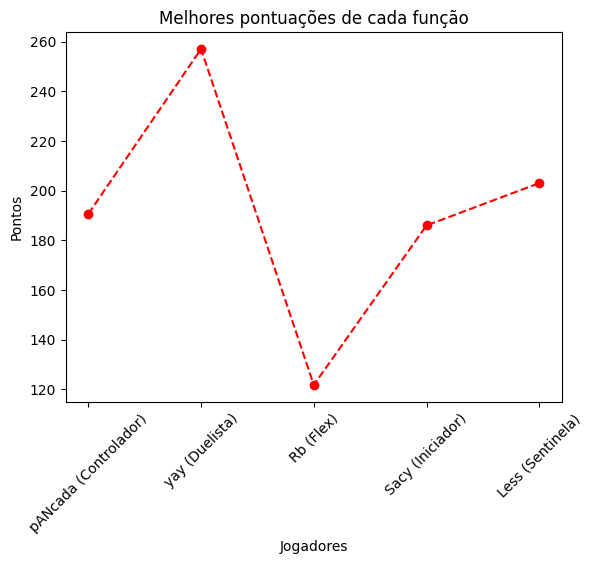

In [128]:
plt.plot(TopPlayers['Jogador e Função'], TopPlayers['Pontos'], color='red', linestyle='--', marker='o')
plt.xlabel('Jogadores', )
plt.xticks(rotation=45)
plt.ylabel('Pontos')
plt.title('Melhores pontuações de cada função')

## ***Separando os piores por Função***

In [129]:
df['Pontos'] = df['K/D'] * df['Rodadas Vencidas']


In [130]:
piores_indices = df.groupby('Função')['Pontos'].nsmallest(1).index.get_level_values(1)

In [131]:
BottonPlayers = df.loc[piores_indices]


In [132]:
BottonPlayers['Jogador e Função'] = BottonPlayers['Jogador'] + ' (' + BottonPlayers['Função'] + ')'
BottonPlayers

,Jogador,Equipe,Nacionalidade,Matou,Morreu,K/D,KAST,Ganhos,Função,HS%,Rodadas Jogadas,Rodadas Vencidas,Rodadas Perdidas,Rank,Classificação,Pontos,Jogador e Função
33,dimasick,TL,Kazakhstan,54,74,0.73,67%,"\t$8,000.00",Controlador,38.5,81,42,39,"7,8",30.66,30.66,dimasick (Controlador)
32,Scream,TL,Belgium,69,73,0.95,60%,"\t$8,000.00",Duelista,27.0,81,42,39,"7,8",39.90,39.90,Scream (Duelista)
30,Nivera,TL,Belgium,60,77,0.78,57%,"\t$8,000.00",Flex,33.5,81,42,39,"7,8",32.76,32.76,Nivera (Flex)
39,Shyy,LEV,Chile,39,64,0.61,71%,"\t$8,000.00",Iniciador,22.0,88,35,53,"7,8",21.35,21.35,Shyy (Iniciador)
38,Tacolilla,LEV,Chile,51,68,0.75,63%,"\t$8,000.00",Sentinela,24.0,88,35,53,"7,8",26.25,26.25,Tacolilla (Sentinela)


Text(0.5, 1.0, 'Piores pontuações de cada função')

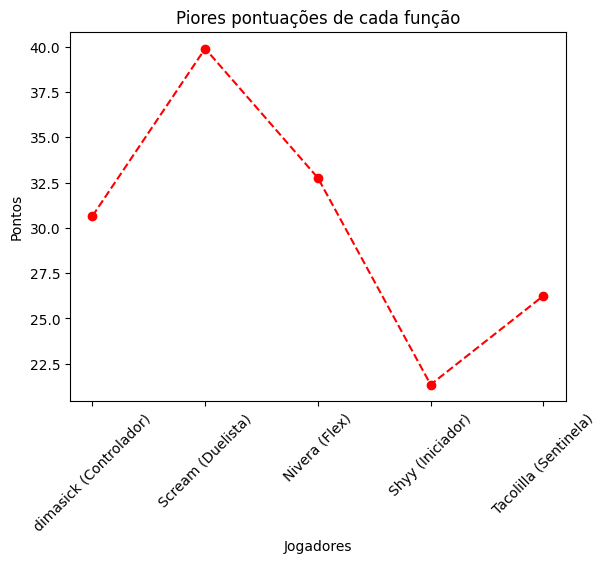

In [133]:
plt.plot(BottonPlayers['Jogador e Função'], BottonPlayers['Pontos'], color='red', linestyle='--', marker='o')
plt.xlabel('Jogadores', )
plt.xticks(rotation=45)
plt.ylabel('Pontos')
plt.title('Piores pontuações de cada função')

# **Comparando desempenho por País** #

In [150]:
indice_times = df.groupby(['Nacionalidade', 'Equipe'])['Rodadas Vencidas'].sum()
indice_times

Nacionalidade   Equipe
Argentina       LOUD      155
Belgium         TL         84
Brazil          LOUD      620
Canada          OPTC      362
                XSET       71
Chile           LEV       175
Finland         FNC        79
                TL         42
France          FNC        79
International   FPX       236
Kazakhstan      TL         42
Latvia          FPX       118
South Corea     DRX       725
Sweeden         FPX       118
Turkey          FNC        79
Ukraine         FPX       118
United Kingdom  FNC       158
                TL         42
                XSET       71
United States   OPTC      543
                XSET      213
Name: Rodadas Vencidas, dtype: int64

<Axes: ylabel='Rodadas Vencidas'>

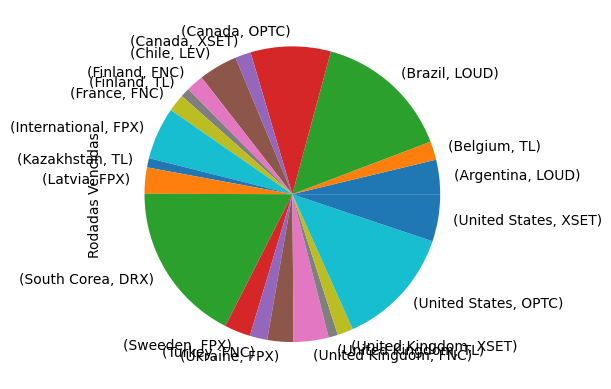

In [153]:
indice_times.plot.pie()
